In [1]:
import numpy as np
import re
import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.dpi"] = 100  # 200 e.g. is really fine, but slower

from functools import partial

from IPython.display import clear_output


# time to sleep for visual debuggin
sleepy = 0.0

In [2]:
Ngrey = 256
greys = np.linspace(0, 1, Ngrey)

colors = [[g, g, g] for g in greys]

red = [1, 0, 0]
# green = [0, 1, 0]
# blue = [0, 0, 1]

# colors[9] = green
# colors[100] = blue
colors[255] = red

mymap = ListedColormap(colors)

In [3]:
imr = partial(plt.imshow, cmap=mymap)

In [4]:
im = partial(plt.imshow, cmap="gray")

In [5]:
def grid_to_array(grid: list):
    
    # grid = grid.strip().replace(".", "0").replace("#", "1")
    
    int_list = []

    for row in grid: # initial_grid.split("\n"):
        
        row = row.strip().replace(".", "0").replace("#", "1")

        int_list.append([int(e) for e in list(row)])
        
    return np.asarray(int_list)

In [6]:
with open("input.txt") as f:
    data = f.read().split("\n\n")

In [7]:
def tile_to_tuple(tile: str):

    tile_num = re.search(r"Tile\s(\d+):\n", tile).group(1)

    tile_array = tile.split("\n")[1:]

    tile_array = grid_to_array(tile_array)

    return tile_num, tile_array

In [8]:
tiles = dict([tile_to_tuple(t) for t in data])

I need to find 4 tiles that only have 2 matching sides, those will be the corners.

In [9]:
arr = tiles["2411"]

In [10]:
upper = arr[0, :]
lower = arr[-1, :]
right = arr[:, -1]
left = arr[:, 0]

In [11]:
np.fliplr(arr)

array([[1, 0, 1, 0, 0, 1, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 1, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 0, 0, 0, 0, 1, 1],
       [1, 0, 1, 1, 0, 1, 0, 0, 1, 1]])

In [12]:
def find_array_borders(arr, listify=True):
    
    upper = list(arr[0, :])
    lower = list(arr[-1, :])
    right = list(arr[:, -1])
    left = list(arr[:, 0])
    
    if not listify:
        upper = arr[0, :]
        lower = arr[-1, :]
        right = arr[:, -1]
        left = arr[:, 0]
    
    return upper, lower, right, left

In [13]:
# set([(1,0), (0,1), (0,1)])

In [14]:
def find_b(arr):

    borders = []

    for a in [arr, np.fliplr(arr), np.flipud(arr)]:

        borders.append(list(a[0, :]))
        borders.append(list(a[-1, :]))
        borders.append(list(a[:, -1]))
        borders.append(list(a[:, 0]))
        
    return borders

In [15]:
# %%timeit
# all(np.isin(np.array([0, 1, 0, 1, 1, 0, 0, 1, 0, 1]), find_array_borders(arr, False)))

In [16]:
# %%timeit
[0, 1, 0, 1, 1, 0, 0, 1, 0, 1] in find_array_borders(arr)

True

In [17]:
def find_num_matching_borders(tile_num: str, verbose=False):

    total = 0

    current_array_borders = find_b(tiles[tile_num])

    if verbose:
        print("Current")
        print(current_array_borders)

    # for border in find_array_borders(arr):
    for k, tile in tiles.items():

        if k != tile_num:

            for b in find_b(tile):

                if b in current_array_borders:
                    if verbose:
                        print("Found")
                        print(k, b)

                    total += 1

    return total

In [18]:
find_num_matching_borders("2411")

12

In [19]:
unmatch = {k:v for k,v in tiles.items() if find_num_matching_borders(k) == 0}

assert unmatch == {}

In [20]:
l = [find_num_matching_borders(tn) for tn, t in tiles.items()]

In [21]:
from collections import Counter

In [22]:
Counter(l)

Counter({12: 100, 9: 40, 6: 4})

In [23]:
corners = unmatch = {k:v for k,v in tiles.items() if find_num_matching_borders(k) == 6}

In [24]:
val = 1

for x in [int(e) for e in corners.keys()]:
    val *= x

In [25]:
val # 63187742854073

63187742854073

## Part 2

In [26]:
def get_flips(arr: np.ndarray):
    
    ars = []

    for arrangement in (arr, np.flipud(arr), np.fliplr(arr)):

        if arrangement.tolist() not in ars:

            ars.append(arrangement.tolist())

        for i in range(1, 4):

            new = np.rot90(arrangement, i).tolist()

            if new not in ars:

                ars.append(new)


    ars = np.array([np.array(e) for e in ars])
    
    return ars

for a in get_flips(np.arange(0,4).reshape(2, -1)):
    print(a)
    print(type(a))

In [27]:
def find_array_borders(arr, listify=True):

    upper = list(arr[0, :])
    lower = list(arr[-1, :])
    right = list(arr[:, -1])
    left = list(arr[:, 0])

    if not listify:
        upper = arr[0, :]
        lower = arr[-1, :]
        right = arr[:, -1]
        left = arr[:, 0]

    return {"upper": upper, "lower": lower, "right": right, "left": left}

In [28]:
border_pairs = {"right": "left", "left": "right", "lower": "upper", "upper": "lower"}

In [29]:
def find_match(arr: np.ndarray, border: str, verbose=False):

    to_match = find_array_borders(arr)[border]

    if verbose:
        print("Current")
        print(to_match)

    for k, tile in tiles_to_place.items():

        for arrangement in get_flips(tile):

            for border_name, border_value in find_array_borders(arrangement).items():

                if (border_name == border_pairs[border]) and (border_value == to_match):

                    if verbose:
                        print(f"Found {k}")

                    tiles_to_place.pop(k)

                    return arrangement

In [30]:
assert len(tiles) == 144

In [31]:
tiles_to_place = tiles.copy()

In [32]:
print(len(tiles_to_place))

current = corners["3209"]

print(current.shape)

tiles_to_place.pop("3209")

done = []

while True:

    done.append(current)

    current = find_match(current, "right", False)  # lower + right -> upper left corner

    if current is None:
        break


print(len(done))

assert len(done) == 12

144
(10, 10)
12


In [33]:
upper_left_right = done.copy()

In [34]:
current = corners["3209"]

print(len(tiles_to_place))

print(current.shape)

done = []

while True:
    
    done.append(current)

    current = find_match(current, "lower", False) # lower + right -> upper left corner

    if current is None:
        break
        
        
print(len(done))

assert len(done) == 12

132
(10, 10)
12


In [35]:
upper_left_down = done.copy()

In [36]:
corners_left = corners.copy()

In [37]:
seen = set()

# starting corner
seen.add("3209")

for k,v in corners_left.items():
    
    for a in get_flips(v):
    
        if np.all(a == upper_left_down[-1]) or np.all(a == upper_left_right[-1]):
            seen.add(k)

In [38]:
for corner in seen:
    
    corners_left.pop(corner)
    try:
        tiles_to_place.pop(corner)
    except:
        print("aready removed", corner)
    
corners_left

aready removed 3701
aready removed 3209
aready removed 3803


{'1399': array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 0],
        [1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 1, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
        [0, 0, 1, 0, 0, 1, 0, 1, 0, 1]])}

In [39]:
bottom_right_corner = corners_left["1399"]

tiles_to_place.pop("1399");

In [40]:
bottom_right_corner

array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [0, 1, 1, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 1]])

In [41]:
# tiles_to_place = bu.copy()
# bu = tiles_to_place.copy()

In [42]:
current = bottom_right_corner

print(len(tiles_to_place))

print(current.shape)

done = []

while True:
    
    done.append(current)

    current = find_match(current, "left", False) # upper + left -> bottom right corner

    if current is None:
        break
        
        
print(len(done))

assert len(done) == 11

120
(10, 10)
11


In [43]:
bottom_right_left = done.copy()

assert len(bottom_right_left) == 11

In [44]:
current = bottom_right_corner

print(len(tiles_to_place))

print(current.shape)

done = []

while True:
    
    done.append(current)

    current = find_match(current, "upper", False) # upper + left -> bottom right corner

    if current is None:
        break
        
        
print(len(done))

assert len(done) == 11

110
(10, 10)
11


In [45]:
bottom_right_up = done.copy()

assert len(bottom_right_up) == 11

In [46]:
len(tiles_to_place)

100

In [47]:
image = np.zeros((120, 120), dtype="int64")

In [48]:
image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
tile_size = 10

In [50]:
image[0:10, 0:10].shape

(10, 10)

In [51]:
image[10:20, 0:10].shape

(10, 10)

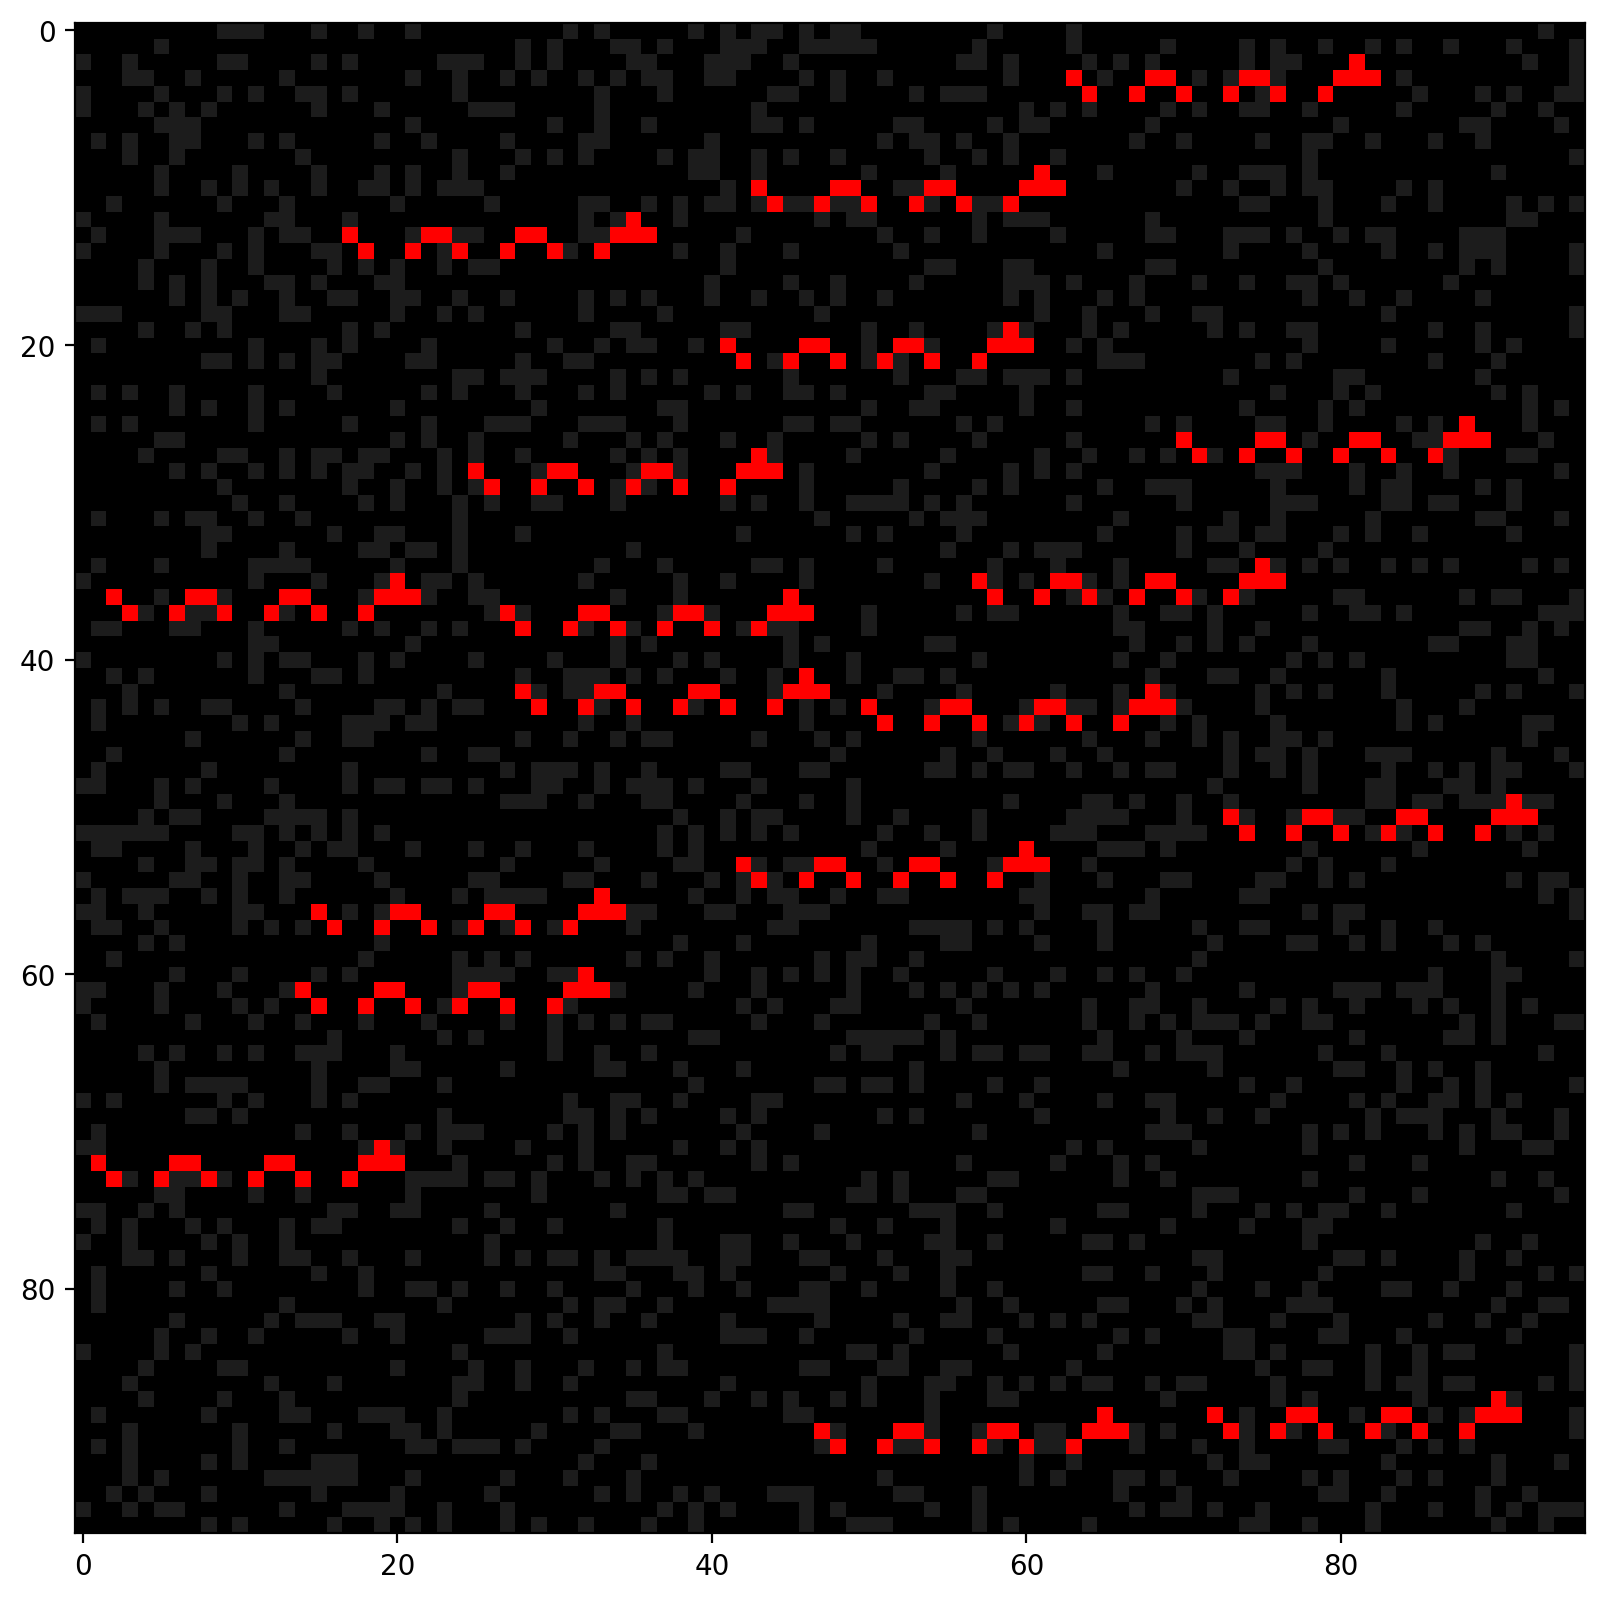

In [52]:
current = 0

im(image)
plt.show()
time.sleep(8)

clear_output(wait=True)

for tile in upper_left_down:

    image[current : current + 10, :tile_size] = tile

    im(image)
    plt.show()
    time.sleep(sleepy)
    clear_output(wait=True)

    current += tile_size

current = 0

for tile in upper_left_right:

    image[:tile_size, current : current + 10] = tile

    im(image)
    plt.show()
    time.sleep(sleepy)
    clear_output(wait=True)

    current += tile_size

current = 0

for tile in bottom_right_left:

    if current == 0:
        image[-10:, current - 10 :] = tile

    else:
        image[-10:, current - 10 : current] = tile

    im(image)
    plt.show()
    time.sleep(sleepy)
    clear_output(wait=True)

    current -= tile_size

current = 0

for tile in bottom_right_up:

    if current == 0:
        image[current - 10 :, -10:] = tile

    else:
        image[current - 10 : current, -10:] = tile

    # image[current - 10 : current, -10:] = tile

    im(image)
    plt.show()
    time.sleep(sleepy)
    clear_output(wait=True)

    current -= tile_size


# 0, 10, 20... 80


for col in range(10, 101, 10):

    # im(image)
    # plt.show()

    for row in range(10, 101, 10):

        # im(image)
        # plt.show()

        coords = (row, row + 10, col, col + 10)

        left_edge = image[coords[0] : coords[1], col - 1]

        assert left_edge.shape[0] == 10

        upper_edge = image[row - 1, coords[2] : coords[3]]

        assert upper_edge.shape[0] == 10

        seen = set()

        found = False

        for k, tile in tiles_to_place.items():

            if k not in seen:

                for arrangement in get_flips(tile):

                    borders = find_array_borders(arrangement)

                    if (borders["left"] == left_edge.tolist()) and (
                        borders["upper"] == upper_edge.tolist()
                    ):

                        image[
                            coords[0] : coords[1], coords[2] : coords[3]
                        ] = arrangement

                        im(image)
                        plt.show()
                        time.sleep(sleepy)

                        found = True

                        seen.add(k)

        clear_output(wait=True)


for col in range(0, 120, 10):

    image[:, col] = 9
    image[:, col - 1] = 9


imr(image)
plt.show()
time.sleep(sleepy)
clear_output(wait=True)


for row in range(0, 120, 10):

    image[row, :] = 9
    image[row - 1, :] = 9


imr(image)
plt.show()
time.sleep(sleepy)


full = []
for row in range(image.shape[0]):

    c = [e for e in image[row] if e != 9]

    if c:
        full.append(c)

f = np.asarray(full)

print(f.shape)

clear_output(wait=True)

im(f)
plt.show()
time.sleep(sleepy)
clear_output(wait=True)


monster_len = """
#.###...#.##...#.##O###.
.O##.#OO.###OO##..OOO##.
..O#.O..O..O.#O##O##.###
""".strip().replace(
    "\n", ""
)

monster_len = list(monster_len).count("O")


def get_monster_relative(coord: tuple):

    row = coord[0]

    col = coord[1]

    return [
        (row + 1, col + 1),
        (row + 1, col + 4),
        (row + 1, col + 7),
        (row + 1, col + 10),
        (row + 1, col + 13),
        (row + 1, col + 16),
        (row, col + 5),
        (row, col + 6),
        (row, col + 11),
        (row, col + 12),
        (row, col + 17),
        (row, col + 18),
        (row, col + 19),
        (row - 1, col + 18),
    ]



arr_found = None

monsters_final = None

monster_coords = []

for arrangement in get_flips(f):
    
    clear_output(wait=True)
    im(arrangement)
    plt.show()
    time.sleep(sleepy)

    it = np.nditer(arrangement, flags=["multi_index"])

    monsters = 0

    for point in it:

        if point == 1:

            try:

                vals = []

                for coord in get_monster_relative(it.multi_index):

                    if arrangement[coord] == 1:
                        vals.append(True)
                    elif arrangement[coord] == 0:
                        vals.append(False)
                    else:
                        raise ValueError

                if all(vals):
                    # print("found")
                    monsters += 1
                    
                    to_show = arrangement.copy()
                    
                    to_show[it.multi_index] = 9
                    
                    monster_coords.append(it.multi_index)
                    
                    clear_output(wait=True)
                    imr(to_show)
                    plt.show()
                    clear_output(wait=True)
                    
                    for coord in get_monster_relative(it.multi_index):
                        
                        monster_coords.append(coord)
                        
                        to_show[coord] = 9
                        
                        imr(to_show)
                        plt.show()
                        clear_output(wait=True)
                        
                        
                    
                    

            except IndexError:
                monsters = monsters

    if monsters != 0:
        print(monsters)
        
        monsters_final = monsters
        arr_found = arrangement
        
        
for p in monster_coords:
    
    arr_found[p] = 9

clear_output(wait=True)
imr(arr_found)
plt.show()
clear_output(wait=True)

```
#.###...#.##...#.##O###.
.O##.#OO.###OO##..OOO##.
..O#.O..O..O.#O##O##.###
```


In [ ]:
np.unique(arr_found, return_counts=True)

In [ ]:
2422 - (monsters_final * monster_len)